# Motenge-Boma-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
    * [Matrix aus Position und Verzierungselement](#Matrix-aus-Position-und-Verzierungselement)
    * [Mantel-Test](#Mantel-Test)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'MTB'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [3]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MTB%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

In [4]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
KPT/MTB          1.0
MKL/MTB (?)      1.0
MTB            133.0
MTB (?)         56.0
All            191.0
Name: objID, dtype: float64

In [5]:
a = pd.Series({'GE':sum(df['Anzahl'].loc[df['Anzahl'] == 1]),     # Anzahl der GE
           'Scherben':sum(df['Anzahl'].loc[df['Anzahl'] != 1])})  # Anzahl der ausgezählten Scherben
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
GE,166,70.338983
Scherben,70,29.661017


In [6]:
df_pivot = df.pivot_table(values = 'Anzahl', index = ['ort_fluss', 'Ort', 'bef_nr'], columns = 'Typ', aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Typ                                       KPT/MTB  MKL/MTB (?)   MTB  MTB (?)
ort_fluss Ort                     bef_nr                                     
Lua       Ilawa (Fpl. 232)        85/101      NaN          NaN   1.0      NaN
          Maluba (Fpl. 230)       85/101      NaN          NaN   2.0      NaN
                                  85/103      NaN          NaN   2.0      NaN
Ubangi    Balongoi (Fpl. 214)     85/101      1.0          NaN  13.0      NaN
          Batanga (Fpl. 209)      85/101      NaN          NaN   5.0      8.0
          Bomboko (Fpl. 210)      85/101      NaN          NaN   NaN      1.0
          Dongo (Fpl. 202)        85/101      NaN          NaN   4.0      2.0
                                  85/102      NaN          NaN   1.0      NaN
          Imese (Fpl. 201)        85/101      NaN          NaN   NaN      1.0
          Libenge (Fpl. 208)      85/101      NaN          NaN  25.0      1.0
          Maoko (Fpl. 207)        85/101      NaN          1.0  27.0      4.0
          Mbati-Ngombe (Fpl. 204) 85/101      NaN          NaN  12.0      NaN
          Mboko 1 (Fpl. 217)      85/101      NaN          NaN   7.0      8.0
          Mboma (Fpl. 211)        85/101      NaN          NaN  10.0     14.0
          Mokelo (Fpl. 213)       85/101      NaN          NaN   5.0     17.0
          Mondoli (Fpl. 212)      85/101      NaN          NaN   7.0     16.0
          Motenge-Boma (Fpl. 206) 85/101      NaN          NaN  30.0      1.0
          Nzambi (Fpl. 205)       85/101      NaN          NaN   7.0      3.0

In [8]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl  Gewicht
ort_fluss Ort                     bef_nr                 
Lua       Ilawa (Fpl. 232)        85/101       1       19
          Maluba (Fpl. 230)       85/101       2       63
                                  85/103       2      142
Ubangi    Balongoi (Fpl. 214)     85/101      14     1341
          Batanga (Fpl. 209)      85/101      13      446
          Bomboko (Fpl. 210)      85/101       1       58
          Dongo (Fpl. 202)        85/101       6      201
                                  85/102       1       11
          Imese (Fpl. 201)        85/101       1       44
          Libenge (Fpl. 208)      85/101      26     1554
          Maoko (Fpl. 207)        85/101      32     2479
          Mbati-Ngombe (Fpl. 204) 85/101      12      650
          Mboko 1 (Fpl. 217)      85/101      15     1302
          Mboma (Fpl. 211)        85/101      24     1223
          Mokelo (Fpl. 213)       85/101      22     1285
          Mondoli (Fpl. 212)      85/101      23      858
          Motenge-Boma (Fpl. 206) 85/101      31     2438
          Nzambi (Fpl. 205)       85/101      10      489

> **Tab. #** Motenge-Boma-Gruppe: Anzahl und summiertes Gewicht von Keramikfunden.

Anzahl der Fundstellen:

In [9]:
len(df_pivot.index)

18

Anzahl Scherben

In [10]:
np.sum(df_pivot['Anzahl'])

236

Summe Gewicht

In [15]:
np.sum(df_pivot['Gewicht'])/1000

14.603

## Technologische Merkmale (*fabrics*)

In [16]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%MTB%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [17]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


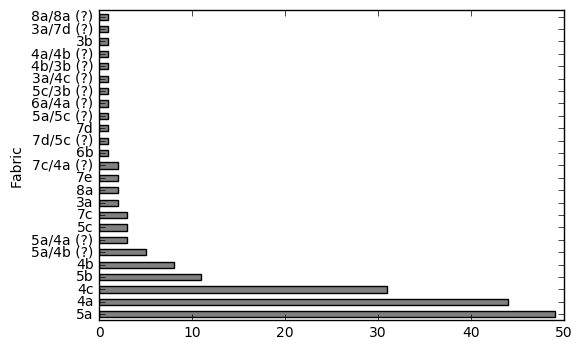

In [18]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [19]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
5a,49,27.683616
4a,44,24.858757
4c,31,17.514124
5b,11,6.214689
4b,8,4.519774


In [20]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,NaN,NaN
wenig,1.0,0.694444
mittel,5.0,3.472222
viel,56.0,38.888889
sehr viel,82.0,56.944444


In [21]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,NaN,NaN
F,1.0,0.694444
M,5.0,3.472222
C,90.0,62.500000
VC,48.0,33.333333


In [23]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,117,81.250000
S/Gl,10,6.944444
S/Gl/Laterit,3,2.083333
S/Org,3,2.083333
S/rote Partikel,3,2.083333
S/Gl/Org,2,1.388889
S/Laterit,2,1.388889
S/Bg,1,0.694444
S/Org/Gl,1,0.694444


### Brennfarbe

In [24]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%MTB%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,59,34.302326
Sonstig,82,47.674419
Weiß,31,18.023256


In [25]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [26]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

s        90
bg       87
g        69
         66
br       26
         13
s s      13
bg bg    11
 bg       9
bg s      7
dtype: int64

### Oberfläche der Scherben

In [27]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%BBL%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
glatt,36,61.016949
leicht rau,21,35.593220
rau,2,3.389831


### Wandungsdicke

In [28]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%MTB%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


In [29]:
df['Wandung'].describe()

/home/dirk/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    134.000000
mean       8.044776
std        2.643948
min        3.000000
25%             NaN
50%             NaN
75%             NaN
max       24.000000
Name: Wandung, dtype: float64

In [30]:
df['Wandung'].var()

6.990461227696103

### Scherbentypen

In [31]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Scherbe,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MTB%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

In [32]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,2.0,0.851064
R,168.0,71.489362
W,65.0,27.659574
B,0.0,0.000000


In [33]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

> **Motenge-Boma-Gruppe** Scherbentypen

## Gefäßformen

In [87]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MTB%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [88]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


Anzahl der Stücke, welche der 'Motenge-Boma'-Gruppe zugewiesen werden könne und bei denen eine Gefäßeform ermittelt werden konnte:

In [89]:
df_pivot['objID'].sum()

120

Verteilung der Gefäßformen der 'Motenge-Boma'-Gruppe:

In [90]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,81,67.5
sicher,39,32.5


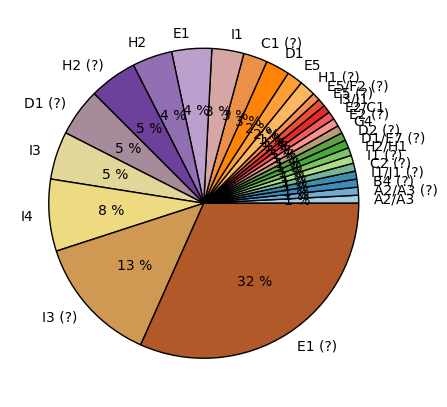

In [91]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

> **Motenge-Boma-Gruppe** Gefäßformen

nur ganz sicher 'Motenge-Boma':

In [92]:
# via .str.contains nur noch solche Einträge auswählen, die sicher sind (ohne ? oder anderen Kram)
df = df.loc[~df['Form_Gef'].str.contains(' ()')]
# df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app
/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


> **Abb. #** Motenge-Boma-Gruppe: Gefäßformen vonsicher der Gruppe zugeweisenen Stücken

In [93]:
# alles hinter der 1. Stelle abschneiden, um nur die Grundform zu haben
df['Form_Gef_GR'] = df['Form_Gef'].map(lambda x: str(x)[:1])

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef_GR', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [3]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MTB%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

In [4]:
a = df.loc[df['Form_Gef'].str.contains("I")]   # I-Schalen
b = df.loc[df['Form_Gef'].str.contains("E")]   # Töpfe
c = df.loc[~df['Form_Gef'].str.contains("I") | ~df['Form_Gef'].str.contains("E")]   # Rest
fig = plt.figure(1)
fig.set_size_inches(12,15)

ax = plt.subplot(421)

c['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3', alpha = 0.5)
a['muendungsD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G8a', alpha = 0.5)

plt.axvline(c['muendungsD'].mean(), color='g', linestyle = '--')
plt.axvline(b['muendungsD'].mean(), color='b', linestyle = '--')
plt.axvline(a['muendungsD'].mean(), color='r', linestyle = '--')

plt.xlabel("Mündungsdurchmesser [cm]")

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

ax = plt.subplot(422)

c['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5, orientation='horizontal')
#b['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5, orientation='horizontal')
a['muendungsH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G8a', alpha = 0.5, orientation='horizontal')

plt.axhline(c['muendungsH'].mean(), color='g', linestyle = '--')
plt.axhline(b['muendungsH'].mean(), color='b', linestyle = '--')
plt.axhline(a['muendungsH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['muendungsH'].hist(histtype='stepfilled', orientation='horizontal')
plt.ylabel("Mündungshöhe [cm]")

ax = plt.subplot(423)

plt.scatter(c['maxD'], c['muendungsH'], alpha=0.5, c = 'g', s = 50, label = 'Weitere')
plt.scatter(b['maxD'], b['muendungsH'], alpha=0.5, c = 'b', s = 50, label = 'G3')
plt.scatter(a['maxD'], a['muendungsH'], alpha=0.5, c = 'r', s = 50, label = 'G8a')#
plt.legend(loc = 2)
plt.xlabel("Maximaldurchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")

ax.plot([0, 10,20,40],[0, 10,20,40], color='black', linestyle = '--')
ax.text(35.5, 33, '1:1', color='black', fontsize=15)

ax.plot([0, 10,20,40],[0, 5,10,20], color='black', linestyle = '--')
ax.text(35.5, 15, '2:1', color='black', fontsize=15)

plt.xlim(0,40) 
plt.ylim(0,40) 

ax.set_aspect('equal')

ax = plt.subplot(424)

c['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
# b['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G1b', alpha = 0.5)
a['maxD-muendH'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G8a', alpha = 0.5)

plt.axvline(c['maxD-muendH'].mean(), color='g', linestyle = '--')
plt.axvline(b['maxD-muendH'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD-muendH'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

# df['maxD-muendH'].hist(histtype='stepfilled', fc='#CCCCCC')
plt.xlabel("Maximaler Durchmesser / Mündungshöhe")

ax = plt.subplot(425)

c['minD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['minD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3', alpha = 0.5)
a['minD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G8a', alpha = 0.5)

plt.axvline(c['minD'].mean(), color='g', linestyle = '--')
plt.axvline(b['minD'].mean(), color='b', linestyle = '--')
plt.axvline(a['minD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

#df['minD'].hist(histtype='stepfilled', fc='#86B404')
plt.xlabel("Minimaler Durchmesser [cm]")

ax = plt.subplot(426)

c['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3', alpha = 0.5)
a['muend-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G8a', alpha = 0.5)

plt.axvline(c['muend-min'].mean(), color='g', linestyle = '--')
plt.axvline(b['muend-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['muend-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 1)

#df['muend-min'].hist(histtype='stepfilled', fc='#E1F5A9')
#plt.axvline(df['muend-min'].mean(), color='r', linestyle = '--')
# plt.legend(["Mittelwert"])
plt.xlabel("MündungsD / MinD")

ax = plt.subplot(427)

c['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3', alpha = 0.5)
a['maxD'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G8a', alpha = 0.5)

plt.axvline(c['maxD'].mean(), color='g', linestyle = '--')
plt.axvline(b['maxD'].mean(), color='b', linestyle = '--')
plt.axvline(a['maxD'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.legend(loc = 2)

# df['maxD'].hist(histtype='stepfilled', fc='#2E64FE')
plt.xlabel("Maximaler Durchmesser [cm]")

ax = plt.subplot(428)

c['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'g', label = 'Weitere', alpha = 0.5)
b['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'b', label = 'G3', alpha = 0.5)
a['max-min'].hist(histtype='stepfilled', stacked = False, fc = 'r', label = 'G8a', alpha = 0.5)

plt.axvline(c['max-min'].mean(), color='g', linestyle = '--')
plt.axvline(b['max-min'].mean(), color='b', linestyle = '--')
plt.axvline(a['max-min'].mean(), color='r', linestyle = '--')

ax.xaxis.grid(False)
ax.yaxis.grid(False)

# df['max-min'].hist(histtype='stepfilled', fc='#81BEF7')
# plt.axvline(df['max-min'].mean(), color='r', linestyle = '--')
plt.legend(["Mittelwert"])
plt.legend(loc = 1)
plt.xlabel("MaxD / MinD")

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-7_MTB_Keramik-Abmessungen.pdf')
plt.show()

### Form: Bauch

In [5]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MTB%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [6]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,66,74.157303
A3,8,8.988764
A2,7,7.865169
A1 (?),3,3.370787
D2,2,2.247191
B1 (?),1,1.123596
D1,1,1.123596
D1/A1,1,1.123596


In [7]:
df_pivot.plot(y = 'objID', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Haufigkeit')
plt.ylabel('Gefäßbauch')

### Korrelation: Gef-Form & Bauchform

In [46]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', columns = 'Form_Bauch', aggfunc = len, fill_value = 0)
#df_pivot

fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

### Mündungs- und Randformen

In [17]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MTB%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [18]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M1,43,41.747573
M2,24,23.300971
M3,23,22.330097
M4,5,4.854369
M5,5,4.854369
M1/M4,1,0.970874
M2 (?),1,0.970874
M4 (?),1,0.970874


In [19]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

8

> **Tab. #** Motenge-Boma-Gruppe: Mündungsformen

In [20]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B2.3,42,28.965517
A2.5,13,8.965517
A2,12,8.275862
B1,11,7.586207
A2.6,10,6.896552


> **Tab. #** Motenge-Boma-Gruppe: Randformen

In [21]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [14]:
#df_pivot.loc[df_pivot.index.str.contains("R13")]
df_pivot.loc[df_pivot.index.str.contains("B2.3")]

,objID,Prozent
Form_Rand,,
B2.3,42,28.965517
B2.3/A4.4,2,1.379310
B2.3/A2.4 (?),1,0.689655
B2.3 (?),1,0.689655


In [15]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

145

In [16]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

33

In [59]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', columns = 'Form_Rand', aggfunc = len, fill_value = np.nan)
fig = plt.figure()
fig.set_size_inches(12, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='YlOrRd')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
#for (i, j), z in np.ndenumerate(df_pivot):
#    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

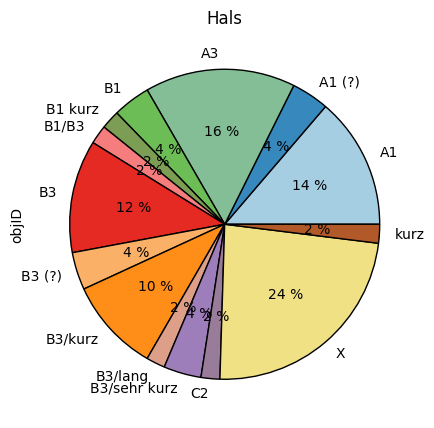

In [60]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

In [61]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

### Bodenformen

In [62]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MTB%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden
0,MBO,Mboma,1500,MTB,E5,B1
1,MBN,Mbati-Ngombe,5421,MTB,I3,B1


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


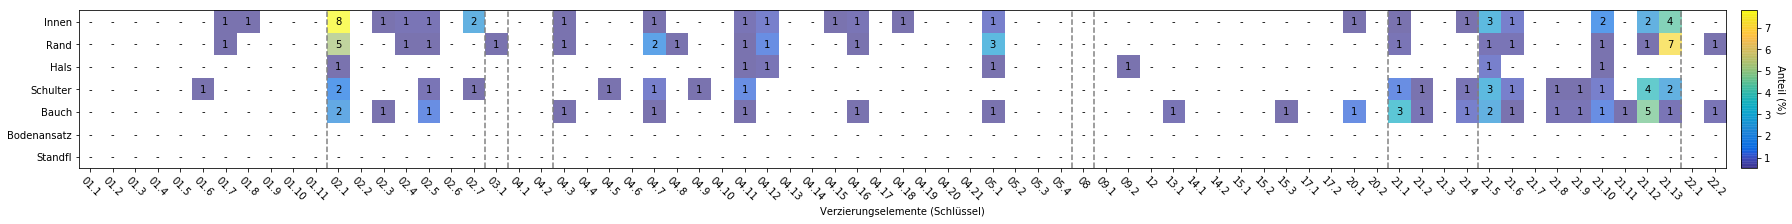

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-7_Motenge-Boma_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

### Matrix aus Position und Verzierungselement

In [14]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzName_alt,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%MTB%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,objID,posID,verzID,pos,verzName,verzName_alt,verzBeschr,Typ,Form_Gef
0,39,3,41,2 Rand,21.12,V08j,Schnitzroulette,KPT/MTB,H1 (?)
1,39,7,4,5 Bauch,02.5,V01d,bogenförmige Rillen,KPT/MTB,H1 (?)
2,39,7,41,5 Bauch,21.12,V08j,Schnitzroulette,KPT/MTB,H1 (?)
3,43,6,41,4 Schulter,21.12,V08j,Schnitzroulette,MTB,E2 (?)
4,91,2,1,1 Innen,02.1,V01a,horizontale Rille,MTB (?),None


In [15]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
#df_pivot = df_pivot.fillna(0)
df_pivot

verzName,01.6,01.7,01.8,02.1,02.3,02.4,02.5,02.7,03.1,04.11,...,21.11,21.12,21.13,21.2,21.4,21.5,21.6,21.8,21.9,22.2
pos,,,,,,,,,,,,,,,,,,,,,
1 Innen,NaN,1.0,1.0,25.0,1.0,2.0,2.0,8.0,NaN,2.0,...,NaN,8.0,14.0,NaN,1.0,9.0,3.0,NaN,NaN,NaN
2 Rand,NaN,1.0,NaN,17.0,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,2.0,23.0,NaN,NaN,2.0,2.0,NaN,NaN,1.0
3 Hals,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4 Schulter,1.0,NaN,NaN,5.0,NaN,NaN,2.0,1.0,NaN,4.0,...,NaN,12.0,8.0,1.0,2.0,9.0,3.0,1.0,1.0,NaN
5 Bauch,NaN,NaN,NaN,7.0,1.0,NaN,5.0,NaN,NaN,1.0,...,1.0,16.0,2.0,3.0,3.0,8.0,1.0,2.0,2.0,2.0
6 Bodenansatz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [16]:
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

In [17]:
fig = plt.figure()
fig.set_size_inches(12, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap=parula_map, alpha = .66)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-1-7_Motenge-Boma_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [18]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [19]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [26]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21.")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,174,53.211009
Weitere Verzierungen,153,46.788991


In [27]:
# nur Roulette-Verzierungen herausfiltern
b = df.loc[df['verzName'].str.contains("21.")]

c = pd.Series({'vegetabilisches Roulette':len(b.loc[df['verzName_alt'].str.contains("V08a")].index),
               'Schnitz-Roulette':len(b.loc[~df['verzName_alt'].str.contains("V08a")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
Schnitz-Roulette,146,83.908046
vegetabilisches Roulette,28,16.091954


### Beschränkung auf Verzierungstypen:

In [77]:
# Verzierungsvarianten (alles hinter der 3. Stelle) abschneiden
bigdata['verzTyp'] = bigdata['verzName'].map(lambda x: str(x)[:3])

# Kreuztabelle aus der Summe von Feld n berechnen – Blankoliste = 0 vs. DB = 1
df_pivotBig = bigdata.pivot_table(values = 'n', index = 'pos', columns = 'verzTyp', aggfunc = np.sum)
df_pivotBig = df_pivotBig.sort_index(ascending=False)

# Prozente bezogen auf die Summe der Zeilen-Summen (also insgesamt)
df_pivotBig_perc = df_pivotBig.apply(lambda c: c / df_pivotBig.sum().sum() * 100, axis=1)

# 0er ersetzen
df_pivotBig_perc = df_pivotBig_perc.replace(0, np.nan)

# df_pivotBig_perc
# display(df_pivotBig.head())

# Sortierung für graphische Darstellung umdrehen
df_pivotBig_perc = df_pivotBig_perc.sort_index(ascending = True)

NameError: name 'bigdata' is not defined

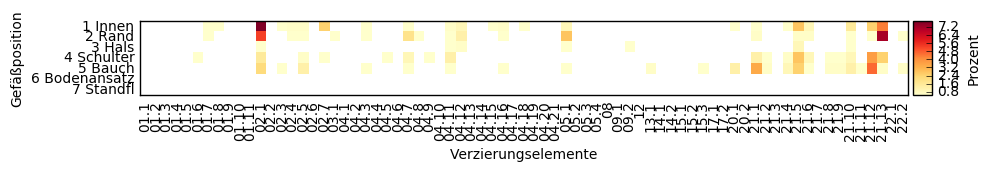

In [78]:
fig = plt.figure()
fig.set_size_inches(10, 5)

# plt.figure()
ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap='YlOrRd')

plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index)
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation='vertical')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Prozent')

ax.tick_params(top = 'off', bottom = 'off', right = 'off', left = 'off')

plt.tight_layout()

plt.show()

## Verbreitung

In [79]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
5,Imese (Fpl. 201),201,18.105096,2.116407,MTB (?)
2,Dongo (Fpl. 202),202,18.404747,2.721870,MTB
7,Mbati-Ngombe (Fpl. 204),204,18.495671,2.888154,MTB
13,Nzambi (Fpl. 205),205,18.637255,3.161920,MTB
12,Motenge-Boma (Fpl. 206),206,18.648645,3.244495,MTB
6,Maoko (Fpl. 207),207,18.642191,3.407332,MTB
4,Libenge (Fpl. 208),208,18.632694,3.648189,MTB
1,Batanga (Fpl. 209),209,18.594438,3.710706,MTB
2,Bomboko (Fpl. 210),210,18.594426,3.912055,MTB (?)
9,Mboma (Fpl. 211),211,18.648525,3.947071,MTB


In [80]:
df.to_csv("../data/processed/3-1-1-7_MTB_Verbreitung.csv", index = False)

## Appendix

Welche Stilgruppen kamen im Material aus Motengo-Boma alle vor?

In [81]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Art, 
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) == 'MTB')
           AND ((t_Obj.Art) == 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [82]:
df_pivot = df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


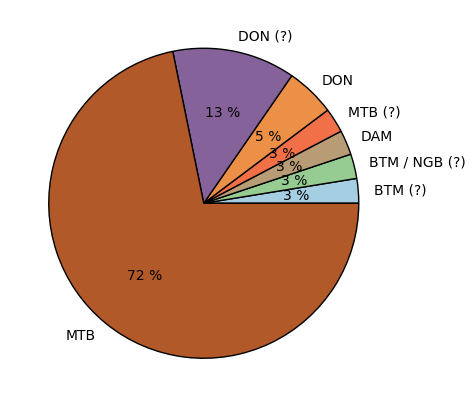

In [83]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

findet sich 'R15 alt' wirklich nur bein MTB-Keramik?

In [85]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Rand
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Form_Rand) Like '%R15 alt%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len)

,objID


## Tafeln

In [8]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Bauch,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Bauch,Form_Boden
0,8,5,DON,85/101,NaN,20,MTB (?),I3 (?),B1,,None
1,10,5,MBN,85/101,NaN,20,MTB,D2 (?),None,A2,None
2,10,7,MBN,85/101,NaN,43,MTB,I3,A4.5,A1,None
3,11,7,MTB,85/101,NaN,3,MTB,H1 (?),A4.4/C1,A1,None
4,11,8,MTB,85/101,NaN,10,MTB,None,A2.6,A1,None
5,11,10,MTB,85/101,NaN,9,MTB,None,A2 (?),,None
6,12,1,MTB,85/101,NaN,34,MTB,None,B2.3,,None
7,12,2,MTB,85/101,NaN,39,MTB,E1,A2.6,A1,None
8,12,3,MTB,85/101,NaN,40,MTB,None,A2 (?),,None
9,12,4,MTB,85/101,NaN,29,MTB,E1,B2.3,A1,None
